In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

In [52]:
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

In [53]:
#Retrieving files and creating necessary environments, some code borrowed from ds100.org.
source_data_url = 'http://www.ds100.org/fa19/assets/datasets/proj1-SFBusinesses.zip'
target_file_name = 'data.zip'

dest_path = fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)

Using cached version downloaded: Thu Nov  7 16:09:57 2019


In [54]:
import zipfile
my_zip = zipfile.ZipFile('data.zip')
list_names = my_zip.namelist()
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)
dsDir = Path('data')
bus = pd.read_csv('data/businesses.csv', encoding='ISO-8859-1')
ins = pd.read_csv('data/inspections.csv')
vio = pd.read_csv('data/violations.csv')

__This project is an exploratory data analysis exercise, using data from food safety recors in San Francisco's restaurants. The bus dataframe contains data about businesses, the ins dataframe contains data about inspections, and the vio dataframe contains data about health code violations.__

In [55]:
display(bus.head())
display(ins.head())
display(vio.head())
display(ins.describe())
display(bus.describe())
display(vio.describe())

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


In [56]:
is_business_id_unique = len(pd.unique(bus['business_id'])) == len(bus['business_id'])
is_business_id_unique

True

__In the bus dataframe, each entry corresponds to a unique business.__

In [57]:
display(bus.groupby(['business_id']).mean().head())
display(bus.groupby(['name']).mean().head())
display(bus.groupby(['address']).mean().head())

,latitude,longitude
business_id,,
19,37.786848,-122.421547
24,37.792888,-122.403135
31,37.807155,-122.419004
45,37.747114,-122.413641
48,37.764013,-122.465749


,business_id,latitude,longitude
name,,,
MAGNOLIA BREWING COMPANY,93539.0,NaN,NaN
NORDSTROM CAFE BISTRO,1674.0,37.784317,-122.407563
100% DESSERT CAFE,37633.0,37.781988,-122.486252
111 MINNA GALLERY,65776.0,37.787378,-122.399459
12 TRIBES KOSHER FOODS,68597.0,37.787311,-122.446839


,business_id,latitude,longitude
address,,,
,77922.0,NaN,NaN
16TH AND SHOTWELL ST,62277.0,37.779847,-122.418985
1700 O'FARRELL @ FILLMORE ST,33998.0,NaN,NaN
377,7477.0,37.808494,-122.412000
APPROVED LOCATIONS,85318.0,NaN,NaN


__Which zip codes have the highest number of restaurants?__

In [58]:
zip_counts = pd.Series(bus['postal_code']).value_counts()
zip_counts

94110        596
94103        552
94102        462
94107        460
94133        426
94109        380
94111        277
94122        273
94118        249
94115        243
94105        232
94108        228
94114        223
94117        204
94112        195
94124        191
94123        173
94121        160
94104        139
94132        133
94116         99
94134         77
94127         71
94131         49
94158         32
94130          7
94143          5
94188          4
CA             2
94013          2
00000          2
94129          2
94014          2
94101          2
94080          1
94545          1
94066          1
94621          1
941            1
94602          1
64110          1
92672          1
941102019      1
94120          1
95105          1
941033148      1
94544          1
Ca             1
Name: postal_code, dtype: int64

__Any non-5 digit zip code is an incorrectly entered zip code (such as 'CA', '941', or '941102019'.__ 

In [59]:
print('zip_counts describes', sum(zip_counts), 'records.')
print('The original data have', len(bus), 'records')

zip_counts describes 6166 records.
The original data have 6406 records


__The data seems to have 6406 - 6166 = 240 missing postal codes.__

In [60]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

In [61]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

In [62]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


__A sample of some of the businesses that have missing zip codes.__

In [63]:
bus[bus['postal_code'].isnull()].head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,NaN,37.785632,-122.429794,+14155190341,NaN
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,NaN,37.759943,-122.421332,+14153109293,NaN
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,NaN,37.752581,-122.416482,+14155507510,NaN
1762,10372,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,NaN,37.739110,-122.416404,+14152062142,NaN
1763,10373,EL TONAYENSE #1,1717 HARRISON ST,San Francisco,CA,NaN,37.769426,-122.413446,+14155596127,NaN
1764,10376,GOOD FRIKIN CHICKEN,10 29TH ST,San Francisco,CA,NaN,37.744369,-122.420967,+14158601365,NaN
1766,10406,SUNSET YOUTH SERVICES,3918 JUDAH ST,San Francisco,CA,NaN,37.760560,-122.504027,NaN,NaN
1778,10964,ANGEL'S HOT DOGS,CORNER OF ALAMEDA AND HENRY ADAMS,San Francisco,CA,NaN,NaN,NaN,NaN,NaN


In [64]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

__The list above represents all of the zip codes in downtown SF. Any business with a zip code not in the above list will be removed from the dataframe. The weird_zip_code_businesses is a dataframe containing entries with exclusively non-SF zip codes.__

In [65]:
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes)]
weird_zip_code_businesses = weird_zip_code_businesses[~weird_zip_code_businesses['postal_code_5'].isnull()]
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


In [66]:
display(weird_zip_code_businesses[weird_zip_code_businesses['postal_code']=='94602'])
display(weird_zip_code_businesses[weird_zip_code_businesses['postal_code']=='94545'])

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
5060,85459,ORBIT ROOM,1900 MARKET ST,San Francisco,CA,94602,NaN,NaN,+14153705584,94602


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545


__Sample manual replacement of an incorrect zip code:__

In [67]:
bus['postal_code_5'] = bus['postal_code_5'].str.replace('94602', '94102')

In [68]:
bus = bus[bus['postal_code'].isin(all_sf_zip_codes)]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [69]:
num_missing_longs = bus[bus['longitude'].isnull()].shape[0]
num_missing_longs

2940

__Analysis will be narrowed to densest SF regions, corresponding to the following zip codes:__

In [70]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

__Beyond zip codes, latitudes and longitudes will now also be analyzed. The following represents the top 5 zip codes with the most entries missing longitude values, in descending order.__

In [71]:
bus_sf = bus[bus['postal_code'].isin(sf_dense_zip)]
gpc = bus_sf.groupby(['postal_code']).count()
gpc['diff'] = gpc['business_id'] - gpc['longitude']
num_missing_in_each_zip = gpc.iloc[:,9].sort_values(ascending=False)
num_missing_in_each_zip.head()

postal_code
94110    294
94103    284
94107    275
94102    221
94109    171
Name: diff, dtype: int64

__The following represents the 5 zip codes with the highest proportion of missing longitude values.__

In [72]:
gpc['proportion'] = gpc['diff']/gpc['business_id']
fraction_missing_df = pd.concat([gpc['diff'], gpc['business_id'], gpc['proportion']], axis=1)# make sure to use this name for your dataframe 
fraction_missing_df = fraction_missing_df.rename(columns={'diff':'count null', 'business_id':'count non null', 'proportion':'fraction null'})
fraction_missing_df = fraction_missing_df.sort_values(by=['fraction null'], ascending=False)
fraction_missing_df.index.name = 'postal_code_5'
fraction_missing_df.head()

,count null,count non null,fraction null
postal_code_5,,,
94124,118,191,0.617801
94107,275,460,0.597826
94104,79,139,0.568345
94105,127,232,0.547414
94132,71,133,0.533835


__After taking a quick look at the business data, we will now shift gears into the inspection data and do a more in-depth, thorough analysis. From the business data, here are some key points:__

    -Business id's are unique, and can therefore be used as both an identifying tool and as a key for joining      tables.
    -Many entries had erroneous zip codes. Incorrect zip codes (wrong format, or non-SF codes) were dropped. If we were to be very careful and thorough, we could manually look up each restaurant for incorrect zip codes and     edit them.
    -A huge number of entries were missing longitude values. Although fixing would take a fair bit of time, if we  remove incorrect zip codes or addresses the process can be automated.

In [73]:
rows_in_table  = ins.shape[0]
unique_ins_ids = len(ins.groupby(['business_id']).count())
unique_ins_ids

5766

__The overwhelmingly most common type of inspection is 'routine'. The other value in inspection is 'complaint'. There is only one occurrence of this, and therefore it is not useful to perform analysis on this when there is only a sole data point.__

__The date values are not in formats that are particularly easy to use, so they will be manipulated into a more analysis-friendly form.__

In [74]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


In [75]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


In [76]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


__The range is 2015-2018, with the number of insepctions being quite varied, ranging from 308 to 5443. 2016 and 2017 are somewhat similar in number of inspections, although 2018 is very low (probably indicating that the data only contains a small portion of 2018 (such as January only))__

In [77]:
ins.groupby(['year']).count()

,business_id,score,date,type,new_date
year,,,,,
2015,3305,3305,3305,3305,3305
2016,5443,5443,5443,5443,5443
2017,5166,5166,5166,5166,5166
2018,308,308,308,308,308


__A barplot seems like a good visualization tool of the distribution of inspection scores, since the scores are given as discrete integers. The distribution is very left skewed, with the vast majority of the values appearing over a score of 70. Interestingly, above 94 there are no instances of 95, 97, and 99, and for some reason only even numbers (96, 98, 100) are preferred. These observations imply that restaurants are mostly keeping to health regulations, and most of them show acceptable health standards.__

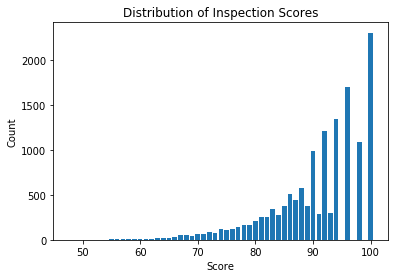

In [78]:
data = ins.groupby(['score']).count().drop(['date', 'type'], axis=1)
plt.bar(data.index, data['business_id'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Inspection Scores');

__The ins and bus dataframes will now be merged so we can see the scores of each business.__

In [79]:
ins_named = ins.merge(bus, how='left').drop(['city', 'state', 'postal_code', 'latitude', 'longitude', 'phone_number', 'postal_code_5'], axis=1)
ins_named.head()

,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


__The restaurant with the lowest score is D&A Cafe. Reading off of yelp, some positive reviews include: "Solid 4star hole in the style Chinese food", "A lot of restaurants have Gravy Scrambled Egg and Shrimp Chow Fun/Rice on their menu, but VERY few actually make it right. It's got to be one of my personal fav Cantonese dishes, and tbh, this cafe has got it down." Some negative reviews include: "Not sure they could earn their 72 inspection score on a regular day", "Just found an appetizing baby COCKROACH in my to-go order" One review shows a photo of a "Notice of closure", where the business was forced to close because of "immediate dangers to public health or safety and/or operating without a valid health permit", so it seems like the business is now closed due to appaling health and sanitary conditions.__

In [80]:
ins_named.sort_values(['score']).head(30)

,business_id,score,date,type,new_date,year,name,address
13179,86647,48,20160907,routine,2016-09-07,2016,DA CAFE,407 CLEMENT ST
9476,71373,52,20161031,routine,2016-10-31,2016,GOLDEN RIVER RESTAURANT,5827 GEARY BLVD
8885,69199,53,20170127,routine,2017-01-27,2017,MEHFIL INDIAN RESTAURANT,28 02ND ST
7104,61436,54,20150706,routine,2015-07-06,2015,OZONE THAI RESTAURANT AND LOUNGE,598 02ND ST
2192,3459,54,20150407,routine,2015-04-07,2015,BASIL THAI RESTAURANT & BAR,1175 FOLSOM ST
4977,10102,54,20150914,routine,2015-09-14,2015,BODEGA BISTRO,607 LARKIN ST
11952,82134,55,20150427,routine,2015-04-27,2015,HARBOR VILLA RESTAURANT,5238 DIAMOND HEIGHTS BLVD
13400,87652,55,20160721,routine,2016-07-21,2016,POKI TIME,2101 LOMBARD ST
11744,81460,55,20150723,routine,2015-07-23,2015,"LE SOLEIL INTERNATIONAL HOLDINGS, INC",133 CLEMENT ST.
11813,81667,55,20160901,routine,2016-09-01,2016,CRAZY PEPPER,2257 SAN JOSE AVE


__I will now take a look at which restaurant had the most extreme change in inspection score. To make this more accurate and meaningful, only restaurants with 3 or more ratings will be considered.__

In [81]:
each_biz = ins.groupby('business_id').count()
overthree = each_biz[each_biz['score'] >= 3]
businesses = np.array(overthree.index)
swing = ins[ins['business_id'].isin(businesses)]
maxscore = swing.groupby('business_id').max()
minscore = swing.groupby('business_id').min()
swing = swing.groupby('business_id').count()
swing['swing'] = maxscore['score'] - minscore['score']
swing = swing.sort_values(['swing'], ascending=False)
max_swing = bus[bus['business_id'] == swing.index[0]].iloc[0][1]
max_swing

"JOANIE'S DINER INC."

__To see how many times each business is inspected each year, a multi-indexed dataframe seems like a good visualization. The df below represents this data.__

In [82]:
inspections_by_id_and_year = ins.groupby(['business_id', 'year']).count().drop(['date', 'type', 'new_date'], axis=1)
inspections_by_id_and_year = inspections_by_id_and_year.rename(columns={'score':'count'})
inspections_by_id_and_year.head()

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1

__Most businesses only seem to get 1 inspection a year.__

In [83]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

__It may be interesting to see if ratings usually improve over the course of a year. The df below shows the score pair (in chronological order) for restaurants that received 2 inspection in 2016, followed by a scatterplot of this data.__

In [84]:
# Create the dataframe here
ins2 = ins[ins['year'] == 2016]
target = inspections_by_id_and_year.iloc[inspections_by_id_and_year.index.get_level_values('year') == 2016]
target = target[target['count'] == 2]
check = target.index.get_level_values('business_id')
scores_pairs_by_business = ins2.sort_values('date').groupby('business_id').agg({'year':min, 'score':list})
scores_pairs_by_business = scores_pairs_by_business[scores_pairs_by_business.index.get_level_values('business_id').isin(check)]
scores_pairs_by_business = scores_pairs_by_business.rename(columns={'score':'score_pair'}).drop('year', axis=1)
scores_pairs_by_business.head(30)

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"
77,"[91, 96]"
146,"[84, 84]"
217,"[94, 90]"
247,"[83, 86]"


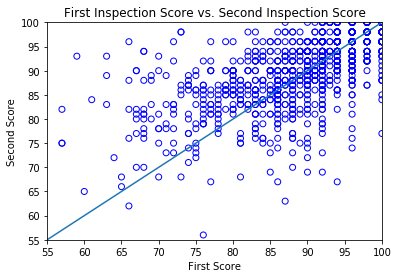

In [85]:
size = scores_pairs_by_business.shape[0]
x = [[scores_pairs_by_business['score_pair'].iloc[x]][0][0] for x in range(size)]
y = [[scores_pairs_by_business['score_pair'].iloc[y]][0][1] for y in range(size)]
plt.scatter(x,y, facecolors='none', edgecolors='b')
slope = np.linspace(55, 100)
plt.plot(slope, slope)
plt.xlim(55, 100)
plt.ylim(55, 100);
plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.title('First Inspection Score vs. Second Inspection Score');

__The score differential is represented below as a histogram - from both the scatter plot and a histogram, the data seems pretty random, and does not really seem conclusive enough to say second inspection scores tend to be higher or lower than the first.__

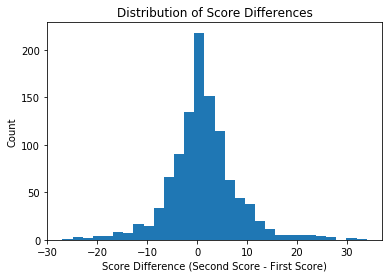

In [86]:
diff = [y[i] - x[i] for i in range(len(x))]
diff = np.array(diff)
plt.hist(diff, bins=30);
plt.xlabel('Score Difference (Second Score - First Score)')
plt.ylabel('Count')
plt.title('Distribution of Score Differences');

__From the inspection data, one can see the following:__

    -Records are kept for each inspection, and many restaurants receive more than one inspection a year, although  the majority only received one.
    -Joining the business and inspection data allowed us to track each restaurant's inspection ratings, as well as allow to identify the lowest and highest scoring establishments.
    -By filtering on inspection numbers per year, we can also see rating swing (change in ratings) data and if this seems to be mostly positive, mostly negative, or relatively random. The results may seem somewhat              counterintuitive, and motivate further study.